In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import tfs
import itertools
import pandas as pd

import decoherence_tools

FONTSIZE=15
PEAK_THRESHOLD=1

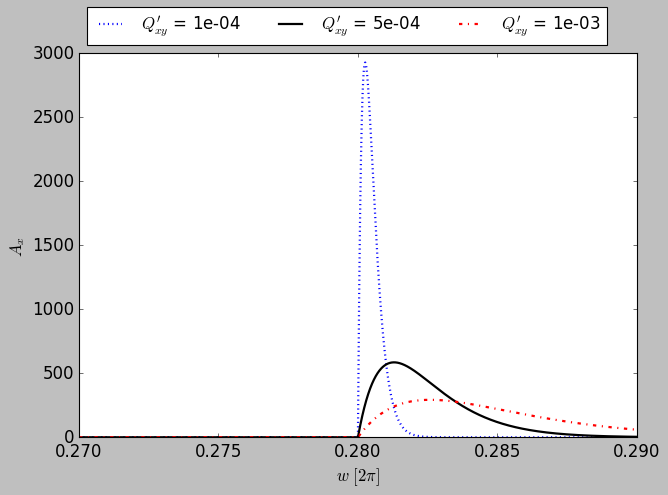

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))


freqs = np.linspace(0.27,0.30, 10001, endpoint=True)
jklm = '1100' # -> leads to tune H(1,0)

colors=['blue', 'black', 'red', 'orange', 'violet', 'cyan']
style=['dotted','solid', 'dashdot']

for i,qxx in enumerate([1e-4, 5e-4, 1e-3]):

    line_df = tfs.TfsDataFrame(
        data={'FREQUENCY': freqs}, 
        headers={
        'jklm':jklm,
        'AX':1.,
        'AY':0.,
        'QX0':0.28,
        'QY0':0.31,
        'QXX':qxx,
        'QXY':0.e-5,
        'QYX':0.e-5,
        'QYY':0.e-5,
    })

    line_df = decoherence_tools.process_df_and_add_spectral_amplitude(line_df)
    
    ax.plot(line_df['FREQUENCY'], line_df['SPECTRAL_AMPLITUDE_X'], linewidth=2, label=f'$ Q_{{xy}}^{{\prime}}$ = {qxx:.0e}', color=colors[i], linestyle=style[i])

ax.set_xlim([0.27, 0.29])

ax.set_xlabel(r'$w~[2\pi]$', fontsize=FONTSIZE)
ax.tick_params(axis='both', which='major', labelsize=FONTSIZE)
ax.set_xticks([0.27, 0.275, 0.28, 0.285, 0.29])
ax.set_ylabel(r'$A_x$', fontsize=FONTSIZE)
ax.legend(fontsize=FONTSIZE, ncol=3, loc='lower left', bbox_to_anchor=(0.,1.))


# plt.savefig('WEPL024_f1.png')    
plt.show()